In [1489]:
# EDA on the hotel reservations dataset
# https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

# Intro 

Hello all, this is my take on this hotel dataset. Big ups to the dataset author, it was a really good dataset, a really clean beginner friendly dataset. I decided to do extensive EDA on this dataset with the mindset of a Buisness Analyst. While I wouldn't use this notebook in a presentation, I'd definitely use the plots in here to either build a presentation or a dashboard. Coming from a reporting background, I feel that a good combination of plots & tables is needed to express the facts of the data. In this big data world, grouping & aggregration is key as it reveals both micro & macro patterns.

I've put a decent amount of notes about my findings as well as my questions. I've also left a lot of comments in between code to explain my thought proceess as well as things that I couldn't figure out.

Feel free to go through this notebook and message me if there's anything. Thanks.

# Table of Contents

[Memory Optimization](#memory-optimization)

[Data Exploration & Analysis](#data-exploratoion--analysis)

* [Correlations](#correlations)
* [phik Correlation](#using-the-phik-correlation)
* [Feature Statistical Significance](#calculating-statistical-significance-of-variables)
* [Groupby/Aggregation EDA](#group-by--aggregation-eda)
* [Double Adult EDA](#now-to-explore-the-double-adult-reservations)
* [Seasonality](#seasonality-eda)
* [Children Complications](#children-complications)

[Random Forest Classifier Model](#now-to-build-a-classifier-model-random-forest)

[Final Model](#now-ill-do-a-grid-search-to-get-the-best-hyper-parameter-values)

In [1490]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../datasets/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../datasets/Hotel Reservations.csv


In [1491]:
import matplotlib.pyplot as plt

from datetime import date
from pandas.api.types import CategoricalDtype
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()

In [1492]:
df=pd.read_csv('../datasets/Hotel Reservations.csv')

### Memory Optimization

Using df.info() & df.describe() to see the type and range of values for each column and then appropriately assigning the right data type.

In [1493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [1494]:
df.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

In [1495]:
print(np.iinfo('int8'))
print(np.finfo('float16'))

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
smallest_normal = 6.10352e-05   smallest_subnormal = 5.96046e-08
---------------------------------------------------------------



In [1496]:
def optimize_memory(df):
    return (
        df
        .assign(
        total_days=(df.no_of_week_nights + df.no_of_weekend_nights).astype('int8'), # new column
        total_guests = (df.no_of_adults + df.no_of_children).astype('int8'), # new column
        )
        .astype({
            'no_of_adults' : 'int8', 
            'no_of_children' : 'int8', 
            'no_of_weekend_nights' : 'int8', 
            'no_of_week_nights' : 'int8', 
            'type_of_meal_plan' : 'category', 
            'required_car_parking_space' : 'int8', 
            'room_type_reserved' : 'category', 
            'lead_time' : 'int16', 
            'arrival_year' : 'int16', 
            'arrival_month' : 'int8', 
            'arrival_date' : 'int8', 
            'market_segment_type' : 'category', 
            'repeated_guest' : 'int8', 
            'no_of_previous_cancellations' : 'int8', 
            'no_of_previous_bookings_not_canceled' : 'int8', 
            # 'avg_price_per_room' : 'float32', # there has to be some easy way to keep 2 decimals with float conversion
            'no_of_special_requests' : 'category', 
            'booking_status' : 'category'
        })
    )

In [1603]:
# this is to check if float conversions have any difference
# np.isclose(df['avg_price_per_room'],hotel['avg_price_per_room']).sum()

In [1498]:
df.memory_usage(deep=True).sum()

16119659

In [1499]:
# from 16.1 mb to 3.4 mb
optimize_memory(df).memory_usage(deep=True).sum()

3412161

In [1500]:
# comparing data of optimize_memory() df and the original df
optimize_memory(df)[df.columns].head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

  no_of_special_requests booking_status  
0                      0   Not_Canceled  
1                      1   Not_Canceled  
2                      0       Canceled  
3                      0       Canceled  
4                      0       Canceled

In [1501]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [1502]:
# from here on I will use the hotel variable df
hotel = optimize_memory(df)

# Data Exploratoion & Analysis 

This is an exercise of querying in Pandas, especially with using groupby & aggregation. 

### Details about the data

According to the dataset author, the Meal Plans are as follows:

* Not Selected – No meal plan selected
* Meal Plan 1 – Breakfast
* Meal Plan 2 – Half board (breakfast and one other meal)
* Meal Plan 3 – Full board (breakfast, lunch, and dinner)

Based on that we can say that this is an ordinal variable i.e. there's an order of cost. 

Similarly, I'll assume that Room Type is also an ordinal variable.

### Data Visualization

I'll be using Plotly & the standard matplotlib. I like Plotly because it generates interactive plots and you can hover over for more context. Also, it's easy to customize the plot colors & labels.

In [1503]:
hotel.select_dtypes('category').head()

type_of_meal_plan room_type_reserved market_segment_type  \
0       Meal Plan 1        Room_Type 1             Offline   
1      Not Selected        Room_Type 1              Online   
2       Meal Plan 1        Room_Type 1              Online   
3       Meal Plan 1        Room_Type 1              Online   
4      Not Selected        Room_Type 1              Online   

  no_of_special_requests booking_status  
0                      0   Not_Canceled  
1                      1   Not_Canceled  
2                      0       Canceled  
3                      0       Canceled  
4                      0       Canceled

In [1504]:
# By default, astype.category assumes categories are unordered i.e. I'll only convert Meal Plan & Room Type to ordinal variables and leave the remaining categorical variables as is

hotel['type_of_meal_plan'] = hotel['type_of_meal_plan']\
                                   .astype(CategoricalDtype(categories=['Not Selected', 'Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3'], ordered=True))
hotel['room_type_reserved'] = hotel['room_type_reserved']\
                                    .astype(CategoricalDtype(categories=['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7'], ordered=True))

In [1505]:
hotel['room_type_reserved'].head(5)

0    Room_Type 1
1    Room_Type 1
2    Room_Type 1
3    Room_Type 1
4    Room_Type 1
Name: room_type_reserved, dtype: category
Categories (7, object): ['Room_Type 1' < 'Room_Type 2' < 'Room_Type 3' < 'Room_Type 4' < 'Room_Type 5' < 'Room_Type 6' < 'Room_Type 7']

In [1506]:
# Convert all category columns to codes
hotel['type_of_meal_plan_code'] = hotel['type_of_meal_plan'].cat.codes
hotel['room_type_reserved_code'] = hotel['room_type_reserved'].cat.codes
hotel['market_segment_type_code'] = hotel['market_segment_type'].cat.codes
hotel['booking_status_code'] = hotel['booking_status'].cat.codes
hotel.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  ...  \
0        Room_Type 1        224          2017  ...   
1        Room_Type 1          5          2018  ...   
2        Room_Type 1          1          2018  ...   
3        Room_Type 1        211          2018  ...   
4        Room_Type 1         48          2018  ...   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

  no_of_special_requests  booking_status  total_days  total_guests  \
0                      0    Not_Canceled           3             2   
1                      1    Not_Canceled           5             2   
2                      0        Canceled           3             1   
3                      0        Canceled           2             2   
4                      0        Canceled           2             2   

   type_of_meal_plan_code room_type_reserved_code market_segment_type_code  \
0                       1                       0                        3   
1                       0                       0                        4   
2                       1                       0                        4   
3                       1                       0                        4   
4                       0                       0                        4   

   booking_status_code  
0                    1  
1                    1  
2                    0  
3                    0  
4                    0  

[5 rows x 25 columns]

In [1507]:
# no missing values
hotel.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
total_days                              0
total_guests                            0
type_of_meal_plan_code                  0
room_type_reserved_code                 0
market_segment_type_code          

In [1508]:
# number of unique entries in each column, 36275 for Booking_ID is valid as Primary Key
hotel.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
total_days                                 25
total_guests                                8
type_of_meal_plan_code            

In [1509]:
# rearranging the columns
new_cols = ['Booking_ID',
'no_of_adults',
'no_of_children',
'total_guests', # putting this col next to # of adults & children
'no_of_weekend_nights',
'no_of_week_nights',
'total_days', # putting this col next to # of weedays & weeknights
'type_of_meal_plan',
'type_of_meal_plan_code', # placing category code values next to category
'required_car_parking_space',
'room_type_reserved',
'room_type_reserved_code', # placing category code values next to category
'lead_time',
'arrival_year',
'arrival_month',
'arrival_date',
'market_segment_type',
'market_segment_type_code', # placing category code values next to category
'repeated_guest',
'no_of_previous_cancellations',
'no_of_previous_bookings_not_canceled',
'avg_price_per_room',
'no_of_special_requests',
'booking_status',
'booking_status_code'] # placing category code values next to category
hotel = hotel[new_cols]

## Correlations

I want to check how the average price per room is affected by the following:
* Total days of stay 
* Total number of guests
* Room type selected
* Week Nights vs Weekends 

My simple assumption is that, the more the number of people or total days of stay, the avg price per room should be lower.

In [1510]:
# pearson correlation
hotel[['total_days','total_guests','no_of_weekend_nights','no_of_week_nights','room_type_reserved_code','avg_price_per_room']].corr(method='pearson')

total_days  total_guests  no_of_weekend_nights  \
total_days                 1.000000      0.127554              0.629339   
total_guests               0.127554      1.000000              0.100658   
no_of_weekend_nights       0.629339      0.100658              1.000000   
no_of_week_nights          0.877513      0.099352              0.179577   
room_type_reserved_code    0.102322      0.441050              0.057368   
avg_price_per_room         0.015768      0.445906             -0.004525   

                         no_of_week_nights  room_type_reserved_code  \
total_days                        0.877513                 0.102322   
total_guests                      0.099352                 0.441050   
no_of_weekend_nights              0.179577                 0.057368   
no_of_week_nights                 1.000000                 0.094125   
room_type_reserved_code           0.094125                 1.000000   
avg_price_per_room                0.022753                 0.469899   

                         avg_price_per_room  
total_days                         0.015768  
total_guests                       0.445906  
no_of_weekend_nights              -0.004525  
no_of_week_nights                  0.022753  
room_type_reserved_code            0.469899  
avg_price_per_room                 1.000000

In [1511]:
# kendall correlation
hotel[['total_days','total_guests','no_of_weekend_nights','no_of_week_nights','room_type_reserved_code','avg_price_per_room']].corr(method='kendall')

total_days  total_guests  no_of_weekend_nights  \
total_days                 1.000000      0.160105              0.486207   
total_guests               0.160105      1.000000              0.108979   
no_of_weekend_nights       0.486207      0.108979              1.000000   
no_of_week_nights          0.726005      0.112431              0.014873   
room_type_reserved_code    0.105370      0.333142              0.056838   
avg_price_per_room        -0.004648      0.293418             -0.020481   

                         no_of_week_nights  room_type_reserved_code  \
total_days                        0.726005                 0.105370   
total_guests                      0.112431                 0.333142   
no_of_weekend_nights              0.014873                 0.056838   
no_of_week_nights                 1.000000                 0.089788   
room_type_reserved_code           0.089788                 1.000000   
avg_price_per_room                0.013285                 0.321603   

                         avg_price_per_room  
total_days                        -0.004648  
total_guests                       0.293418  
no_of_weekend_nights              -0.020481  
no_of_week_nights                  0.013285  
room_type_reserved_code            0.321603  
avg_price_per_room                 1.000000

In [1512]:
# plotting pearson & kendall correlation matrices side-by-side using plotly
# ref https://stackoverflow.com/questions/64268081/creating-a-subplot-of-images-with-plotly

kendall_corr = hotel[['total_days','total_guests','no_of_weekend_nights','no_of_week_nights','room_type_reserved_code','avg_price_per_room']].corr(method='kendall')
pearson_corr = hotel[['total_days','total_guests','no_of_weekend_nights','no_of_week_nights','room_type_reserved_code','avg_price_per_room']].corr(method='pearson')

fig = make_subplots(1,2)

fig.add_trace(
       px.imshow(
        kendall_corr.values.round(2),
        x=kendall_corr.columns,
        y=kendall_corr.index,
        text_auto=True,
        color_continuous_scale='teal',
        ).data[0], row=1, col=1
)
fig.add_trace(
       px.imshow(
        pearson_corr.values.round(2),
        x=pearson_corr.columns,
        y=pearson_corr.index,
        text_auto=True,
        color_continuous_scale='teal',
        ).data[0], row=1, col=2
)
fig.update_layout(paper_bgcolor="#9fbbbf", title='Kendall vs Pearson Coefficients', title_x=0.5)
fig.update(data=[{'hovertemplate':'%{y}<br>%{x}<br>correlation: %{z}'}])
layout = px.imshow(kendall_corr, color_continuous_scale='teal').layout
fig.layout.coloraxis = layout.coloraxis
fig

### Using the phik correlation

In [1513]:
import phik
from phik.report import plot_correlation_matrix

In [1514]:
phik_cols = ['total_days','total_guests','no_of_weekend_nights','no_of_week_nights','room_type_reserved_code','avg_price_per_room'] 
phik_overview = hotel[phik_cols].phik_matrix(interval_cols=phik_cols)

In [1515]:
phik_overview.round(2)

total_days  total_guests  no_of_weekend_nights  \
total_days                     1.00          0.05                  0.83   
total_guests                   0.05          1.00                  0.04   
no_of_weekend_nights           0.83          0.04                  1.00   
no_of_week_nights              0.98          0.04                  0.73   
room_type_reserved_code        0.11          0.59                  0.06   
avg_price_per_room             0.08          0.47                  0.09   

                         no_of_week_nights  room_type_reserved_code  \
total_days                            0.98                     0.11   
total_guests                          0.04                     0.59   
no_of_weekend_nights                  0.73                     0.06   
no_of_week_nights                     1.00                     0.09   
room_type_reserved_code               0.09                     1.00   
avg_price_per_room                    0.05                     0.47   

                         avg_price_per_room  
total_days                             0.08  
total_guests                           0.47  
no_of_weekend_nights                   0.09  
no_of_week_nights                      0.05  
room_type_reserved_code                0.47  
avg_price_per_room                     1.00

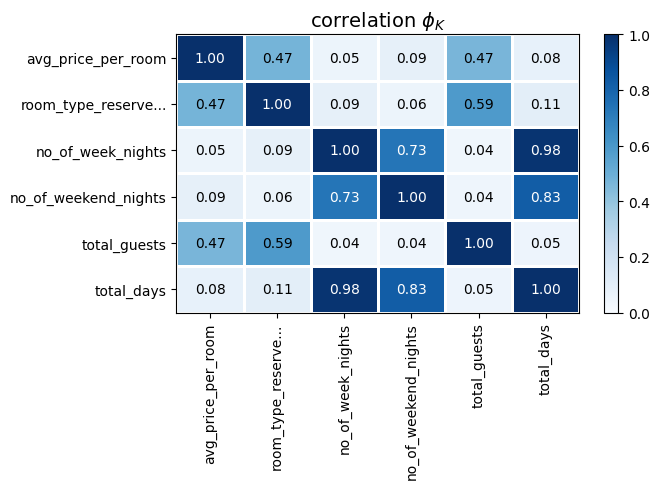

In [1516]:
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1,
                        color_map='Blues',
                        title=r"correlation $\phi_K$",
                        # fontsize_factor=1.5, 
                        # figsize=(10, 8)
)

In [1517]:
# same plot using plotly

fig = px.imshow(phik_overview.values.round(2),
        x=phik_overview.columns,
        y=phik_overview.index,
        text_auto=True,
        color_continuous_scale='teal',
        title='Correlation Phi K',
        )
fig.update_layout(paper_bgcolor="#9fbbbf", title_x=0.5,
                  height=600,
                  margin=dict(l=20, r=100, t=100, b=0)
)
fig.update(data=[{'hovertemplate':'%{y}<br>%{x}<br>Phi K: %{z}'}])
fig

## Calculating statistical significance of variables

Correlation may be present but it may not be statistically significant

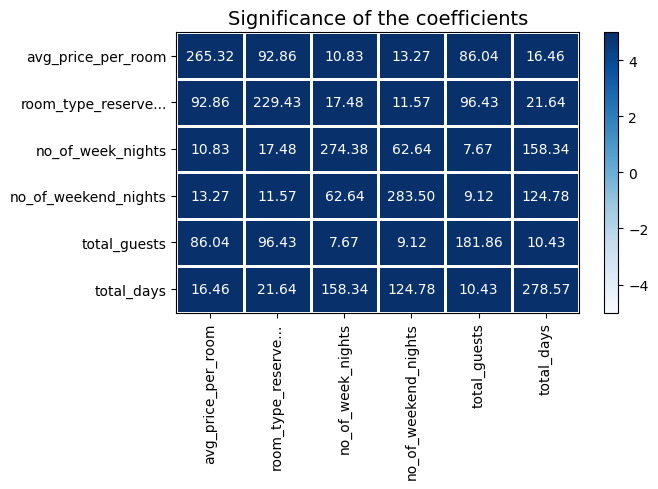

In [1518]:
significance_overview = hotel[phik_cols].significance_matrix(interval_cols=phik_cols)
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        color_map='Blues'
                        # usetex=False, fontsize_factor=1.5, figsize=(14, 10)
)

Based on my understanding of the paper published by the phik authors, it's evident that these variable pairs (i.e. column pairs) are statistically significant. The vmin & vmax represents +- 5 of standard deviations.

ref : https://arxiv.org/pdf/1811.11440.pdf#subsection.5.4

In [1519]:
# correlations scatterplot
fig = px.scatter_matrix(hotel[phik_cols], )
fig.update_layout(paper_bgcolor="#c2d1ed", width=1200,height=1000)

c:\Python\Python38\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



# Group By / Aggregation EDA

In [1520]:
# getting an average price per room by room type & total guests
(hotel[['avg_price_per_room','room_type_reserved','total_guests','Booking_ID']]
    .query('avg_price_per_room > 0')
    .groupby(['total_guests','room_type_reserved'])
    .agg({'avg_price_per_room':'mean','Booking_ID':'count'})
    .reset_index()
    .rename(columns={'Booking_ID':'count'})
    .query('avg_price_per_room > 0 & count > 30')
    .sort_values(['total_guests','room_type_reserved'])
)

total_guests room_type_reserved  avg_price_per_room  count
0              1        Room_Type 1           91.490005   6601
3              1        Room_Type 4          117.679380    532
4              1        Room_Type 5          128.653846     91
7              2        Room_Type 1           97.028156  19399
8              2        Room_Type 2           87.513150    581
10             2        Room_Type 4          117.546683   3545
11             2        Room_Type 5          130.664220    109
12             2        Room_Type 6          161.815735     68
14             3        Room_Type 1          121.588310   1722
17             3        Room_Type 4          145.373015   1907
18             3        Room_Type 5          144.504706     34
19             3        Room_Type 6          175.959474    114
22             4        Room_Type 2          132.369348     46
26             4        Room_Type 6          188.908149    751
27             4        Room_Type 7          218.248167     60

In [1521]:
# plotting room type & total_guests vs avg_price_per_room
t = hotel[['avg_price_per_room','room_type_reserved','total_guests','Booking_ID']].query('avg_price_per_room > 0')\
    .groupby(['total_guests','room_type_reserved'])\
    .agg({'avg_price_per_room':'mean','Booking_ID':'count'})\
    .reset_index()\
    .query('avg_price_per_room > 0 & Booking_ID > 30')\
    .sort_values(['total_guests','room_type_reserved'])

px.line(t, x=t.room_type_reserved,
            y=t.avg_price_per_room, color=t.total_guests)\
    .update_layout(paper_bgcolor="#4a6175", 
                   title='Room Type vs Average Price per Room', title_x=0.5,
                   plot_bgcolor="#869eb5",
                   font_color='#e6e3e3'
                   ).update_traces(line=dict(width=3)
                   ).update_xaxes(categoryorder='array', 
                                  categoryarray= ['Room_Type 1','Room_Type 2','Room_Type 3','Room_Type 4','Room_Type 5','Room_Type 6','Room_Type 7'],
                                  gridcolor='#bdbdbd')

In general, the average price per room goes up with the Room Type as expected but there's definitely a bit of inconsistencies, like with Room_Type 2 & total guests = 2. There are some outliers which is why I used the count > 30 to get a more general result.

In [1522]:
# Rough idea of reservations by no. of days & total guests 
(hotel[['total_days', 'total_guests', 'no_of_weekend_nights', 'no_of_week_nights', 'avg_price_per_room']]
.groupby(['total_days','total_guests'])
.mean('avg_price_per_room')
.head(15)
.query("avg_price_per_room > 0")
)

no_of_weekend_nights  no_of_week_nights  \
total_days total_guests                                            
1          1                         0.233555           0.766445   
           2                         0.231345           0.768655   
           3                         0.240506           0.759494   
           4                         0.137931           0.862069   
           5                         0.250000           0.750000   
2          1                         0.325393           1.674607   
           2                         0.435567           1.564433   
           3                         0.508564           1.491436   
           4                         0.440000           1.560000   
           5                         0.333333           1.666667   
           12                        0.000000           2.000000   

                         avg_price_per_room  
total_days total_guests                      
1          1                      85.638131  
           2                     101.552826  
           3                     137.421230  
           4                     187.183908  
           5                     123.140000  
2          1                      91.806255  
           2                     103.338030  
           3                     140.288775  
           4                     187.676514  
           5                     166.716667  
           12                     84.450000

In [1523]:
# check to make sure groupby numbers are correct
np.mean(np.asarray(hotel[['no_of_week_nights','no_of_weekend_nights','total_days','total_guests']].query('total_days == 1 & total_guests == 1')['no_of_week_nights']))

0.7664446294754371

In [1524]:
(hotel
.groupby('no_of_adults')['Booking_ID']
.agg(['count'])
.sort_values(by='no_of_adults')
)

count
no_of_adults       
0               139
1              7695
2             26108
3              2317
4                16

In [1604]:
t = hotel.groupby('no_of_adults')['Booking_ID'].agg(['count']).sort_values(by='no_of_adults')

fig = go.Figure(data=[go.Pie(labels=t.index.values.tolist(),
                            values=sum(t.values.tolist(),[]))]
                            )
fig.update_layout(
    title = "No. of adults by reservation", title_x=0.5,
    margin=dict(l=20, r=20, t=100, b=0),
    paper_bgcolor="LightSteelBlue", height=600
)
fig.update_traces(hoverinfo='label+percent+value', 
                  textfont_size=15,textinfo='label+percent',
                  pull=[0.4,0,0.3,0,0.3])
fig                            

In [1526]:
# I'm assuming that 21% of single adult reservations would be mostly Corporate
t = hotel.query('no_of_adults == 1').groupby('market_segment_type')['Booking_ID'].count()

fig = go.Figure(data=[go.Pie(labels=t.index.categories.tolist(),
                            values=t.values.tolist())]
                            )
fig.update_layout(
                  title = "Single Adult Reservation Types", title_x=0.5,
                  margin=dict(l=20, r=20, t=100, b=0),
                  paper_bgcolor="LightSteelBlue", height=600
)
fig.update_traces(hoverinfo='label+percent+value', 
                  textfont_size=15,textinfo='label+percent',
                  pull=[0,0,0.1,0,0])
fig      

In [1527]:
# all reservations by market_segment_type
(hotel
 .groupby(['market_segment_type','no_of_adults'])['Booking_ID']
 .count()
 .unstack()
)

no_of_adults           0     1      2     3   4
market_segment_type                            
Aviation               0   123      2     0   0
Complementary          4   199    184     3   1
Corporate              0  1566    438    13   0
Offline                1  2634   7598   295   0
Online               134  3173  17886  2006  15

Based on the table above as well as the plots, it makes sense that Aviation & Corporate have mostly single adult reservations i.e. business trips or momentary stay. Ignoring the obvious online/offline trend which accounts for most reservations in all categories.

In [1528]:
# meal plan chosen by the Corporate folks
(hotel
 .query("market_segment_type == 'Corporate'")
 .groupby('type_of_meal_plan')['Booking_ID']
 .count()
 )

type_of_meal_plan
Not Selected      15
Meal Plan 1     1996
Meal Plan 2        6
Meal Plan 3        0
Name: Booking_ID, dtype: int64

## Now to explore the double adult reservations

Since money matters, I want to dive into the following:

* Room Type
* Meal Plan
* Weeknight vs Weekends

In [1529]:
# plotting room type & meal plans for double adults
t_room = hotel.query("no_of_adults == 2").groupby('room_type_reserved')['Booking_ID'].count()
t_meal = hotel.query("no_of_adults == 2").groupby('type_of_meal_plan')['Booking_ID'].count()


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=t_room.index.categories.tolist(), values=t_room.values.tolist(), name="Room Type Selected", legendgroup='1'),
              1, 1)
fig.add_trace(go.Pie(labels=t_meal.index.categories.tolist(), values=t_meal.values.tolist(), name="Meal Plan", legendgroup='2'),
              1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name+value")
fig.update_layout(
    title_text="Room Type vs Meal Plan for double adult reservations", title_x = 0.5,
    height=600,
    margin=dict(l=100, r=100, t=100, b=20),
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Room Type', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Meal Plan', x=0.82, y=0.5, font_size=20, showarrow=False)],
    paper_bgcolor="#9fc0cc"                  
    )
fig.show()

It's clear that most people choose Room Type 1 & Meal Plan 1. I'm going to assume those are the default options when making a reservation.

In [1605]:
t_days = hotel.query("no_of_adults == 2 & total_days > 0")
t_total = hotel.query("no_of_adults == 2 & total_days > 0").groupby('total_days')['Booking_ID'].count()

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Day of the Week", "Total Days"))
fig.add_trace(
    go.Bar(x=['Weekday','Weekend'], y=[t_days['no_of_week_nights'].sum(), t_days['no_of_weekend_nights'].sum()]),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=t_total.index.tolist(), y=t_total.values.tolist()),
    row=1, col=2
)
fig.update_xaxes(title={'text':'Total Days'},
                 range=[1, 10], row=1, col=2)
fig.update_yaxes(title={'text':'Reservations'})
fig.update_layout(title_text="Type of Days vs Total Days for double adult reservations", title_x=0.5,
                  margin=dict(l=100, r=20, t=100, b=50),
                  paper_bgcolor="LightSteelBlue",
                  showlegend=False)
fig.show()

Looking at the two graphs above, it's clear that most reservations for 2 adults are split roughly 3:1 for weekdays & weekends. From experience, I'd have guessed that most of these reservations start either on Thursday or Friday, and goes till Saturday and on Sunday they check out. 

But seeing the 3:1 split between Weekday & Weekend and high number of reservations with 1-3 total days, it wouldn't be surprising to find that most of the reservations start earlier on the week, like Tuesday or Wednesday.

Since there are 7000+ reservations of 3 days total, it'll be interesting to see what is the arrival day for those reservations. Also, I'll look more into the arrival days for reservations of 1 - 3 days since it accounts for nearly half of the double adult reservations.

To do that, I'll make use of the arrival date columns to extract the day.

In [1531]:
hotel[['arrival_date','arrival_month','arrival_year']]

arrival_date  arrival_month  arrival_year
0                 2             10          2017
1                 6             11          2018
2                28              2          2018
3                20              5          2018
4                11              4          2018
...             ...            ...           ...
36270             3              8          2018
36271            17             10          2018
36272             1              7          2018
36273            21              4          2018
36274            30             12          2018

[36275 rows x 3 columns]

In [1532]:
# create a new df to store datetime for double adults
arrival_day = hotel.query("no_of_adults == 2 & (no_of_weekend_nights != 0 | no_of_week_nights != 0)")\
                          [['total_days','arrival_date','arrival_month','arrival_year']]\
                          .astype({'arrival_date':'str','arrival_month':'str','arrival_year':'str'})
arrival_day["date_combined"] = arrival_day['arrival_year'] + "/" + arrival_day['arrival_month'] + "/" + arrival_day['arrival_date']
# 2018/2/29 is not real, so replacing that with 2018/3/1
arrival_day[arrival_day["date_combined"] == '2018/2/29']=arrival_day[arrival_day["date_combined"] == '2018/2/29'].replace('2018/2/29','2018/3/1')
arrival_day = arrival_day.drop(columns=['arrival_date','arrival_month','arrival_year'])
arrival_day['date_combined'] = pd.to_datetime(arrival_day['date_combined'])
arrival_day.head()

total_days date_combined
0           3    2017-10-02
1           5    2018-11-06
3           2    2018-05-20
4           2    2018-04-11
5           2    2018-09-13

In [1533]:
arrival_day['dayOfWeek'] = arrival_day['date_combined'].dt.dayofweek
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
arrival_day['dayOfWeek'] = arrival_day['dayOfWeek'].apply(lambda x: days[x])
arrival_day

total_days date_combined  dayOfWeek
0               3    2017-10-02     Monday
1               5    2018-11-06    Tuesday
3               2    2018-05-20     Sunday
4               2    2018-04-11  Wednesday
5               2    2018-09-13   Thursday
...           ...           ...        ...
36269           1    2018-10-06   Saturday
36271           4    2018-10-17  Wednesday
36272           8    2018-07-01     Sunday
36273           3    2018-04-21   Saturday
36274           3    2018-12-30     Sunday

[26061 rows x 3 columns]

In [1608]:
t = arrival_day.groupby('dayOfWeek')['total_days'].count()
weekdays = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
px.bar(x= weekdays, 
       y=t.values.tolist(),
       labels={'x':'Day of the Week','y':'Reservations'}
).update_layout(title_text="Day of arrival for double adult reservations", title_x=0.5,
                paper_bgcolor="LightSteelBlue"
)

In [1535]:
(arrival_day
 .query('total_days==3')
 .groupby('dayOfWeek')['date_combined']
 .count()
 )

dayOfWeek
Friday        734
Monday        912
Saturday     1409
Sunday       1624
Thursday      810
Tuesday      1102
Wednesday     945
Name: date_combined, dtype: int64

In [1609]:
# plotting where where total_days == 3
t = arrival_day.query('total_days==3').groupby('dayOfWeek')['total_days'].count()
px.bar(x= weekdays, 
       y=t.values.tolist(),
       labels={'x':'Day of the Week','y':'Reservations'}
).update_layout(title_text="Day of arrival for reservations with total days = 3", title_x=0.5,
                paper_bgcolor="LightSteelBlue"
)

In [1537]:
# plotting where where total_days < 4 since that accounts for nearly half the reservations i.e. ~ 48% 17303/36275
# also plotting where total_days > 4 for the remaining double adult reservations i.e. 24% 8758/36275
t1 = arrival_day.query('total_days < 4').groupby('dayOfWeek')['total_days'].count().reset_index()
t2 = arrival_day.query('total_days >= 4').groupby('dayOfWeek')['total_days'].count().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=weekdays,
                     y=t1.total_days,
                     name='Total Days < 4'
))
fig.add_trace(go.Bar(x=weekdays,
                     y=t2.total_days,
                     name='Total Days >= 4'
))

fig.update_layout(title_text="Day of arrival for reservations", title_x=0.5,
                  yaxis_title='Reservation',
                  xaxis_title='Day of the Week',
                paper_bgcolor="LightSteelBlue",
                margin=dict(l=100, r=150, t=100, b=20)
)

fig

In [1538]:
# count of reservations where arrival starts on either Friday or Saturday
(arrival_day
 .query("dayOfWeek == 'Saturday' | dayOfWeek == 'Friday'")
 .groupby('total_days')['total_days']
 .count()
#  .sum()
 )

total_days
1     1206
2     1330
3     2143
4     1475
5      592
6      175
7      185
8       34
9       17
10      11
11      10
12       7
13       4
14       8
16       1
19       1
22       1
Name: total_days, dtype: int64

#### Double Adult Summary

It makes sense that there's a lot of reservations that starts early on the week as that would explain the 3:1 split of weekdays to weekends. I'm definitely confused why these short stay reservations start early in the week and not towards the weekend. It's possible that it's because these people tend to move around more i.e. from location to location, one hotel to another. 

Since I'm working with dates & days here, I'll now look into seasonal patterns for insights.

## Seasonality EDA

In [1539]:
# Seasonality of booking status
(hotel.
 groupby(['arrival_month','booking_status'])['Booking_ID']
 .count()
 .unstack()
 )

booking_status  Canceled  Not_Canceled
arrival_month                         
1                     24           990
2                    430          1274
3                    700          1658
4                    995          1741
5                    948          1650
6                   1291          1912
7                   1314          1606
8                   1488          2325
9                   1538          3073
10                  1880          3437
11                   875          2105
12                   402          2619

In [1540]:
# plotting seasonality of booking status
t = hotel.groupby(['arrival_month','booking_status'])['Booking_ID'].count().unstack().reset_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=t.Canceled,
    name='Cancelled',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=t.Not_Canceled,
    name='Not Cancelled',
    marker_color='#339966'
))

fig.update_layout(title_text="Booking Status by Month", title_x=0.5,
                paper_bgcolor="LightSteelBlue")
fig

In [1610]:
# plotting reservations by month
t = hotel.groupby('arrival_month')['Booking_ID'].count()

px.bar(hotel['arrival_month'], x=months, y=t.values.tolist(), 
       color=[0,0,0,0,0,0,0,1,1,1,0,0],
       labels={'x':'Months','y':'Reservations'}
       ).update_layout(title_text="Reservations by Month", title_x=0.5,
                paper_bgcolor="LightSteelBlue"
).update_coloraxes(showscale=False,
 colorscale=[[0, 'rgb(67, 81, 204)'], [1, 'rgb(50, 150, 100)']]
 )

From the two graphs above, we can see that reservations are relatively the same for most of the year but it picks up between August - October. Moreover, most of the reservations for the August - January period are confirmed i.e. not cancelled.

It'll be interesting to see what the data looks like for those months, I'll explore that below.

In [1542]:
# count of reservations by total guests on Aug, Sept, Oct
(hotel
 .query("8 <= arrival_month <= 10")
 .groupby(['arrival_month','total_guests'])['Booking_ID']
 .count()
 .unstack()
 .fillna(0)
 .astype(int)
 )

total_guests     1     2    3    4   5   10  11
arrival_month                                  
8               332  2575  711  186   8   0   1
9               903  3296  308  104   0   0   0
10             1314  3518  391   93   0   1   0

In [1611]:
# plotting room type & meal plan for aug-oct reservations
t_room = hotel.query("8 <= arrival_month <= 10").groupby('room_type_reserved')['Booking_ID'].count()
t_meal = hotel.query("8 <= arrival_month <= 10").groupby('type_of_meal_plan')['Booking_ID'].count()


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=t_room.index.categories.tolist(), 
                     values=t_room.values.tolist(), 
                     name="Room Type Selected", 
                     legendgroup='1'),
                     1, 1)
fig.add_trace(go.Pie(labels=t_meal.index.categories.tolist(), 
                     values=t_meal.values.tolist(), 
                     name="Meal Plan", 
                     legendgroup='2'),
                     1, 2)
fig.update_traces(hole=.5, hoverinfo="label+percent+name+value")
fig.update_layout(
    title_text="Room Type vs Meal Plan for August - October reservations", title_x = 0.5,
    height=600,
    margin=dict(l=100, r=200, t=100, b=20),
    annotations=[dict(text='Room Type', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Meal Plan', x=0.82, y=0.5, font_size=20, showarrow=False)],
    paper_bgcolor="#9fc0cc"                  
    )
fig.show()

In [1612]:
# plotting avg_price_per_room changes by room type over the year
t = hotel.query('avg_price_per_room > 0')\
        .groupby(['arrival_month','room_type_reserved'])[['avg_price_per_room','room_type_reserved','Booking_ID']]\
        .agg({'avg_price_per_room':'mean','Booking_ID':'count'})\
        .rename(columns={'Booking_ID':'count'})\
        .query('avg_price_per_room > 0 & count > 0')\
        .reset_index()

px.line(t, x=t.arrival_month,
            y=t.avg_price_per_room,
            color=t.room_type_reserved)\
    .update_layout(paper_bgcolor="#0e1114", 
                   title='Average Price per Room by Room Type over the year', title_x=0.5,
                   plot_bgcolor="#19242e",
                   font_color='#e6e3e3'
                   ).update_traces(line=dict(width=3)
                   ).update_layout(xaxis = dict(
                                   tickmode = 'linear')
                ).update_xaxes(showline=False, linewidth=1, linecolor='white', gridcolor='grey', gridwidth=1
                ).update_yaxes(showline=False, linewidth=1, linecolor='white', gridcolor='grey', gridwidth=0.1)

### Seasonality Summary

From August - January, the reservations look really good in terms of numbers & money. There are more confirmed reservations i.e. Not Cancelled and the number goes up & up. Other than that, the rest of the year is nearly the same across all categories. 

It looks like the average price per room by Room Type over the year stays relatively the same.

### Children Complications

Since there are children with some of the reservations, I want to explore how the room type as well as room cost is associated.

In [1545]:
# First I want to know if reservations with children invlove either a single parent/adult like in a sports team, Or multiple families with >2 adults 
hotel.query("`no_of_children` > 0")

Booking_ID  no_of_adults  no_of_children  total_guests  \
32      INN00033             0               2             2   
60      INN00061             2               2             4   
80      INN00081             2               2             4   
95      INN00096             2               1             3   
99      INN00100             2               2             4   
...          ...           ...             ...           ...   
36221   INN36222             2               2             4   
36227   INN36228             2               2             4   
36231   INN36232             2               1             3   
36249   INN36250             2               2             4   
36269   INN36270             2               2             4   

       no_of_weekend_nights  no_of_week_nights  total_days type_of_meal_plan  \
32                        0                  3           3       Meal Plan 1   
60                        0                  1           1       Meal Plan 1   
80                        0                  2           2       Meal Plan 1   
95                        0                  2           2       Meal Plan 1   
99                        1                  3           4       Meal Plan 1   
...                     ...                ...         ...               ...   
36221                     2                  4           6       Meal Plan 1   
36227                     0                  1           1       Meal Plan 1   
36231                     0                  2           2       Meal Plan 1   
36249                     0                  3           3       Meal Plan 1   
36269                     0                  1           1       Meal Plan 1   

       type_of_meal_plan_code  required_car_parking_space  ... arrival_date  \
32                          1                           0  ...            7   
60                          1                           1  ...            2   
80                          1                           0  ...            1   
95                          1                           1  ...            4   
99                          1                           0  ...           22   
...                       ...                         ...  ...          ...   
36221                       1                           0  ...           24   
36227                       1                           0  ...            6   
36231                       1                           0  ...           28   
36249                       1                           0  ...           27   
36269                       1                           0  ...            6   

       market_segment_type  market_segment_type_code  repeated_guest  \
32                  Online                         4               0   
60                  Online                         4               0   
80                  Online                         4               0   
95                  Online                         4               0   
99                  Online                         4               0   
...                    ...                       ...             ...   
36221               Online                         4               0   
36227               Online                         4               0   
36231               Online                         4               0   
36249               Online                         4               0   
36269               Online                         4               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
32                                0                                     0   
60                                0                                     0   
80                                0                                     0   
95                                0                                     0   
99                                0                                     0   


In [1546]:
# Based on the previous cell, total reservations with children are 2698/36275 or about 7.5%
# the following query checks for total # of traditional single adult or double adult family reservations
(hotel
.groupby(['no_of_adults','no_of_children'])['Booking_ID']
.count()
.reset_index()
.query("(`no_of_adults` == 2 | `no_of_adults` == 1) & `no_of_children` > 0")\
# ['Booking_ID'].sum() # comment this line to see details in table or count
)

no_of_adults  no_of_children  Booking_ID
4              1               1          90
5              1               2          53
6              1               9           1
8              2               1        1502
9              2               2         871
10             2               3          14
11             2               9           1
12             2              10           1

In [1547]:
# there are reservations which are 0 adults but >0 children
(hotel.
query("`no_of_adults` == 0 & `no_of_children` > 0")
)

Booking_ID  no_of_adults  no_of_children  total_guests  \
32      INN00033             0               2             2   
287     INN00288             0               2             2   
653     INN00654             0               2             2   
937     INN00938             0               2             2   
954     INN00955             0               2             2   
...          ...           ...             ...           ...   
34720   INN34721             0               2             2   
34730   INN34731             0               2             2   
34890   INN34891             0               2             2   
35691   INN35692             0               2             2   
35797   INN35798             0               2             2   

       no_of_weekend_nights  no_of_week_nights  total_days type_of_meal_plan  \
32                        0                  3           3       Meal Plan 1   
287                       2                  2           4       Meal Plan 1   
653                       1                  2           3       Meal Plan 1   
937                       0                  3           3       Meal Plan 1   
954                       1                  1           2       Meal Plan 1   
...                     ...                ...         ...               ...   
34720                     0                  3           3       Meal Plan 1   
34730                     1                  1           2       Meal Plan 1   
34890                     2                  2           4       Meal Plan 1   
35691                     2                  1           3       Meal Plan 1   
35797                     0                  2           2       Meal Plan 1   

       type_of_meal_plan_code  required_car_parking_space  ... arrival_date  \
32                          1                           0  ...            7   
287                         1                           0  ...           24   
653                         1                           0  ...           19   
937                         1                           0  ...           14   
954                         1                           0  ...           29   
...                       ...                         ...  ...          ...   
34720                       1                           0  ...           21   
34730                       1                           0  ...           27   
34890                       1                           0  ...           16   
35691                       1                           0  ...           19   
35797                       1                           0  ...           30   

       market_segment_type  market_segment_type_code  repeated_guest  \
32                  Online                         4               0   
287                 Online                         4               0   
653                 Online                         4               0   
937                 Online                         4               0   
954                 Online                         4               0   
...                    ...                       ...             ...   
34720               Online                         4               0   
34730               Online                         4               0   
34890               Online                         4               0   
35691               Online                         4               0   
35797               Online                         4               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
32                                0                                     0   
287                               0                                     0   
653                               0                                     0   
937                               0                                     0   
954                               0                                     0   


In [1548]:
# I guess this particular hotel allows children to make reservations for themselves
(hotel
.query("`no_of_adults` == 0 & `no_of_children` > 0")
.groupby('booking_status')['Booking_ID']
.count()
)


booking_status
Canceled        44
Not_Canceled    95
Name: Booking_ID, dtype: int64

In [1549]:
t = hotel.query("`no_of_adults` == 0 & `no_of_children` > 0").groupby('booking_status')['Booking_ID'].count()

fig = go.Figure(data=[go.Pie(labels=t.index.values.tolist(),
                            values=t.values.tolist())]
                            )
fig.update_layout(
    title = "Children only Reservations", title_x=0.45,
    margin=dict(l=20, r=100, t=100, b=50),
    paper_bgcolor="LightSteelBlue"
)
fig.update_traces(hoverinfo='label+percent+value', 
                  textfont_size=15,textinfo='label+percent',
                  pull=[0,0.1])
fig 


In [1550]:
# plotting room type & meal plan for reservations with & without children
t_room_c = hotel.query("`no_of_children` > 0").groupby('room_type_reserved')['Booking_ID'].count()
t_meal_c = hotel.query("`no_of_children` > 0").groupby('type_of_meal_plan')['Booking_ID'].count()
t_room_no_c = hotel.query("`no_of_children` == 0").groupby('room_type_reserved')['Booking_ID'].count()
t_meal_no_c = hotel.query("`no_of_children` == 0").groupby('type_of_meal_plan')['Booking_ID'].count()


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=t_room_c.index.categories.tolist(), 
                     values=t_room_c.values.tolist(), 
                     name="Room Type Selected", 
                     legendgroup='1'),
                     1, 1)
fig.add_trace(go.Pie(labels=t_room_no_c.index.categories.tolist(), 
                     values=t_room_no_c.values.tolist(), 
                     name="Room Type Selected", 
                     legendgroup='1'),
                     1, 2)
fig.add_trace(go.Pie(labels=t_meal_c.index.categories.tolist(), 
                     values=t_meal_c.values.tolist(), 
                     name="Meal Plan", 
                     legendgroup='2'),
                     2, 1)
fig.add_trace(go.Pie(labels=t_meal_no_c.index.categories.tolist(), 
                     values=t_meal_no_c.values.tolist(), 
                     name="Meal Plan", 
                     legendgroup='2'),
                     2, 2)
fig.update_traces(hole=0, hoverinfo="label+percent+name+value")
fig.update_layout(
    title_text="Room Type vs Meal Plan for reservations with & without Children", title_x = 0.5,
    height=800,
    margin=dict(l=100, r=200, t=100, b=20),
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='with Children', x=0.17, y=0.5, font_size=20, showarrow=False),
                 dict(text='without Children', x=0.85, y=0.5, font_size=20,showarrow=False),
                 dict(text='Room Type', x=0.5, y=0.80, font_size=40, showarrow=False),
                 dict(text='Meal Plan', x=0.5, y=0.15, font_size=40, showarrow=False)],
    paper_bgcolor="#9fc0cc"                  
    )
fig.show()

From the above plots, it's worth noting that reservations with children have nearly double the percentage of Room Type 6 compared to reservations without children. Moreover, the other room types are also higher in numbers. On the other hand, Meal Plan 1 seems to be the usual scenario here i.e. the majority regardless of with or without children.

In [1551]:
# Brief overview of numerical columns with children
(hotel.query("`no_of_children` > 0")[['total_days', 'total_guests', 'no_of_children', 'Booking_ID', 'avg_price_per_room']]
.groupby(['no_of_children','total_guests'])
.agg({'Booking_ID':['count'],'total_guests':['sum'],'total_days':['mean'],'avg_price_per_room':['mean']})
.rename(columns={'Booking_ID':'Reservation'})
# .reset_index()
)

Reservation total_guests total_days  \
                                  count          sum       mean   
no_of_children total_guests                                       
1              1                      1            1   6.000000   
               2                     90          180   3.622222   
               3                   1502         4506   3.201065   
               4                     25          100   3.080000   
2              2                    133          266   3.315789   
               3                     53          159   4.547170   
               4                    871         3484   3.185993   
               5                      1            5   2.000000   
3              3                      5           15   2.800000   
               5                     14           70   2.500000   
9              10                     1           10   3.000000   
               11                     1           11   7.000000   
10             12                     1           12   2.000000   

                            avg_price_per_room  
                                          mean  
no_of_children total_guests                     
1              1                     73.740000  
               2                     96.993556  
               3                    122.712071  
               4                    192.254800  
2              2                     82.045414  
               3                    160.544528  
               4                    183.644811  
               5                     93.700000  
3              3                     70.108000  
               5                    184.768571  
9              10                    95.000000  
               11                    76.500000  
10             12                    84.450000

### Children Summary

There's about 7.5% total reservations with children and the stand out statistic here is the Room Type reserved. While Room Type 1 is majority for all reservations, reservations with children tend to have other room types in the mix by a significant portion. This is key because there's an order to Room Type i.e. money. 

In [1552]:
# repeat guest percentage
print(df[df['repeated_guest']>0].count()[0]/df.count()[0] * 100, '%')

2.563749138525155 %


In [1553]:
# no cancellations percentage
print(df[df['no_of_previous_cancellations']==0].count()[0]/df.count()[0] * 100, '%')

99.06822880771881 %


## Now to build a classifier Model, Random Forest

I hope that was about enough of the EDA and now I'll finish this project with a Random Forest Classifier for the prediction.

In [1554]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import partial_dependence,PartialDependenceDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

ros = RandomOverSampler(random_state=0)


In [1556]:
ml_cols = ['no_of_adults', 'no_of_children', 'total_guests',
       'no_of_weekend_nights', 'no_of_week_nights', 'total_days', 'type_of_meal_plan_code',
       'required_car_parking_space',
       'room_type_reserved_code', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type_code',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests']

In [1557]:
hotel.loc[:,ml_cols]

no_of_adults  no_of_children  total_guests  no_of_weekend_nights  \
0                 2               0             2                     1   
1                 2               0             2                     2   
2                 1               0             1                     2   
3                 2               0             2                     0   
4                 2               0             2                     1   
...             ...             ...           ...                   ...   
36270             3               0             3                     2   
36271             2               0             2                     1   
36272             2               0             2                     2   
36273             2               0             2                     0   
36274             2               0             2                     1   

       no_of_week_nights  total_days  type_of_meal_plan_code  \
0                      2           3                       1   
1                      3           5                       0   
2                      1           3                       1   
3                      2           2                       1   
4                      1           2                       0   
...                  ...         ...                     ...   
36270                  6           8                       1   
36271                  3           4                       1   
36272                  6           8                       1   
36273                  3           3                       0   
36274                  2           3                       1   

       required_car_parking_space  room_type_reserved_code  lead_time  \
0                               0                        0        224   
1                               0                        0          5   
2                               0                        0          1   
3                               0                        0        211   
4                               0                        0         48   
...                           ...                      ...        ...   
36270                           0                        3         85   
36271                           0                        0        228   
36272                           0                        0        148   
36273                           0                        0         63   
36274                           0                        0        207   

       arrival_year  arrival_month  arrival_date  market_segment_type_code  \
0              2017             10             2                         3   
1              2018             11             6                         4   
2              2018              2            28                         4   
3              2018              5            20                         4   
4              2018              4            11                         4   
...             ...            ...           ...                       ...   
36270          2018              8             3                         4   
36271          2018             10            17                         4   
36272          2018              7             1                         4   
36273          2018              4            21                         4   
36274          2018             12            30                         3   

       repeated_guest  no_of_previous_cancellations  \
0                   0                             0   
1                   0                             0   
2                   0                             0   
3                   0                             0   
4                   0                             0   
...               ...                           ...   
36270               0                             0   
36271               0                             0   
36272               0       

In [1555]:
hotel.booking_status_code.value_counts()

1    24390
0    11885
Name: booking_status_code, dtype: int64

In [1558]:
X = hotel.loc[:,ml_cols]
y = hotel.loc[:,'booking_status_code']

# Oversampling to account for the imbalanced booking status
X, y = ros.fit_resample(X, y)

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.4,random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((29268, 19), (19512, 19), (29268,), (19512,))

### First I'll use a Random Forest Classifier with predefined parameters

In [1559]:
no_trees = 100

model_rf = RandomForestClassifier(n_estimators=no_trees,
                                  max_depth=4,
                                  class_weight='balanced')
model_rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4)

In [1560]:
y_train_pred = model_rf.predict(X_train)
y_valid_pred = model_rf.predict(X_valid)

print('AUC Train: {:.4f}\nAUC Valid = {:.4f}'.format(metrics.roc_auc_score(y_train, y_train_pred),
                                                     metrics.roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.7984
AUC Valid = 0.7992


In [1561]:
y_valid_prob = model_rf.predict_proba(X_valid)

print("Probabilities",
      "\n",
      y_valid_prob[:10], 
      "\n\nPredictions\n",
      np.array(y_valid_pred[:10]))

Probabilities 
 [[0.40840862 0.59159138]
 [0.24019466 0.75980534]
 [0.4726577  0.5273423 ]
 [0.57360975 0.42639025]
 [0.31008636 0.68991364]
 [0.40920311 0.59079689]
 [0.6903823  0.3096177 ]
 [0.53087779 0.46912221]
 [0.41439162 0.58560838]
 [0.59767991 0.40232009]] 

Predictions
 [1 1 1 0 1 1 0 0 1 0]


In [1562]:
y_valid.iloc[:10].tolist()

[1, 1, 1, 0, 1, 0, 0, 0, 1, 0]

In [1563]:
# Probabilities for each tree
y_train_prob_tree = np.stack([m.predict_proba(X_train.values)[:,1] for m in model_rf.estimators_])
y_valid_prob_tree = np.stack([m.predict_proba(X_valid.values)[:,1] for m in model_rf.estimators_])

# Find AUC for different levels of Trees
train_auc_trees = [metrics.roc_auc_score(y_train, (y_train_prob_tree[:i+1].mean(0) > 0.5).astype(int)) for i in range(no_trees)]
valid_auc_trees = [metrics.roc_auc_score(y_valid, (y_valid_prob_tree[:i+1].mean(0) > 0.5).astype(int)) for i in range(no_trees)]

len(train_auc_trees), len(valid_auc_trees)

(100, 100)

In [1564]:
fig = go.Figure(go.Scatter(
    y=train_auc_trees,
    name='Train AUC'
)).add_trace(go.Scatter(
    y=valid_auc_trees,
    name='Validation AUC'
))
fig.update_xaxes(title="Number of Trees").update_yaxes(title="Area under Curve (AUC)")
fig.update_layout(margin=dict(l=20, r=100, t=100, b=50),
                  paper_bgcolor="LightSteelBlue"
)
fig.show()

In [1565]:
model_rf = RandomForestClassifier(n_estimators=45,
                                  max_depth=4,
                                  class_weight='balanced')
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=45)

In [1566]:
y_valid_pred = model_rf.predict(X_valid)

print('AUC Valid = {:.4f}'.format(metrics.roc_auc_score(y_valid, y_valid_pred)))

AUC Valid = 0.7990


In [1567]:
model_rf.feature_importances_

array([1.02680409e-02, 1.60121362e-04, 9.71655326e-03, 3.49863183e-03,
       8.65487523e-03, 2.66180147e-02, 1.80815747e-02, 1.02809179e-02,
       1.40482387e-03, 3.77208515e-01, 6.33467210e-02, 4.02918329e-02,
       4.11243248e-03, 8.47730475e-02, 1.64341224e-02, 2.57805943e-04,
       9.65719047e-03, 1.02866155e-01, 2.12368624e-01])

In [1568]:
t = pd.DataFrame({'Variable': ml_cols,
                           'Importance': model_rf.feature_importances_}) \
                .sort_values(by='Importance') \
                .reset_index(drop=True)

In [1569]:
px.bar(y=t.Variable, x=t.Importance, orientation='h', title="Variable/Feature Importance in Classifier")

c:\Python\Python38\lib\site-packages\sklearn\inspection\_partial_dependence.py:153: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

c:\Python\Python38\lib\site-packages\sklearn\inspection\_partial_dependence.py:153: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



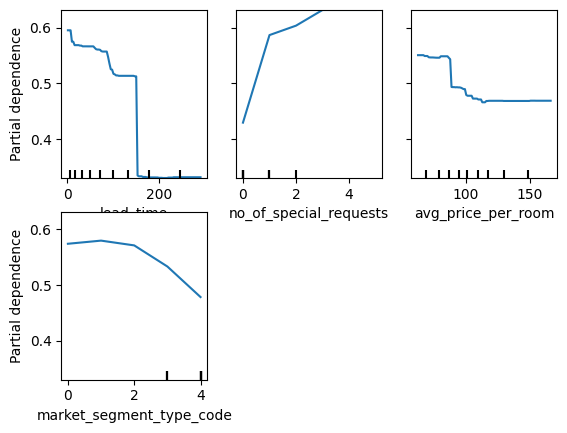

In [1571]:
PartialDependenceDisplay.from_estimator(model_rf, X, features=['lead_time','no_of_special_requests','avg_price_per_room','market_segment_type_code'])

In [1601]:
t.Variable[13:19].tolist()

['arrival_month',
 'arrival_year',
 'market_segment_type_code',
 'avg_price_per_room',
 'no_of_special_requests',
 'lead_time']

In [1585]:
new_ml_cols = t.Variable[13:19].tolist()

In [1586]:
X = hotel.loc[:,new_ml_cols]
y = hotel.loc[:,'booking_status_code']

# Oversampling to account for the imbalanced booking status
X, y = ros.fit_resample(X, y)

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.4,random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((29268, 6), (19512, 6), (29268,), (19512,))

### Now I'll do a grid search to get the best hyper parameter values

Also now I'll use only some of the important features as with fewer features, the model will be simpler and faster

In [ ]:
# I'm using the following notebook by Harsh Kumar for this section 
# ref : https://github.com/harsh1kumar/learning/blob/master/machine_learning/santander_trxn_prediction/03_trxn_pred_rf_hp_tuning.ipynb

RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [1587]:
n_estimators_list = list(range(10,60,10))
criterion_list = ['gini']
max_depth_list = list(range(4,16,4))
min_samples_split_list = [0.001, 0.005]
min_samples_leaf_list = [0.001, 0.005]
max_features_list = ['log2']

params_grid = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list
}

In [1588]:
total_combinations = 1
for k in params_grid.keys(): total_combinations *= len(params_grid[k])

print('Total number of combinations = ', total_combinations)
params_grid

Total number of combinations =  60


{'n_estimators': [10, 20, 30, 40, 50],
 'criterion': ['gini'],
 'max_depth': [4, 8, 12],
 'min_samples_split': [0.001, 0.005],
 'min_samples_leaf': [0.001, 0.005],
 'max_features': ['log2']}

In [1589]:
def my_roc_auc_score(model, X, y): return metrics.roc_auc_score(y, model.predict(X))

model_rf_grid = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                        param_grid=params_grid,
                        cv=3,
                        scoring=my_roc_auc_score,
                        return_train_score=True,
                        verbose=4)

model_rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=10;, score=(train=0.804, test=0.798) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=10;, score=(train=0.800, test=0.796) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=10;, score=(train=0.801, test=0.802) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=20;, score=(train=0.807, test=0.806) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=20;, score=(train=0.806, test=0.805) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=4, m

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 8, 12],
                         'max_features': ['log2'],
                         'min_samples_leaf': [0.001, 0.005],
                         'min_samples_split': [0.001, 0.005],
                         'n_estimators': [10, 20, 30, 40, 50]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x0000026CC75519D0>,
             verbose=4)

In [1590]:

df_cv_results = pd.DataFrame(model_rf_grid.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                           'param_n_estimators', 'param_min_samples_split','param_min_samples_leaf',
                           'param_max_features', 'param_max_depth','param_criterion']]
df_cv_results.sort_values('rank_test_score', inplace=True)
df_cv_results.head(5)


rank_test_score  mean_test_score  mean_train_score param_n_estimators  \
42                1         0.854306          0.862029                 30   
43                2         0.854107          0.862339                 40   
40                3         0.852563          0.858747                 10   
44                4         0.852254          0.861310                 50   
41                5         0.851956          0.860397                 20   

   param_min_samples_split param_min_samples_leaf param_max_features  \
42                   0.001                  0.001               log2   
43                   0.001                  0.001               log2   
40                   0.001                  0.001               log2   
44                   0.001                  0.001               log2   
41                   0.001                  0.001               log2   

   param_max_depth param_criterion  
42              12            gini  
43              12            gini  
40              12            gini  
44              12            gini  
41              12            gini

In [1591]:
model_rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_leaf': 0.001,
 'min_samples_split': 0.001,
 'n_estimators': 30}

In [1592]:
model_rf = RandomForestClassifier(n_estimators=30,
                                  class_weight='balanced',
                                  criterion = 'gini',
                                  max_depth = 12,
                                  max_features = 'log2',
                                  min_samples_leaf = 0.001,
                                  min_samples_split = 0.001
)
model_rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       max_features='log2', min_samples_leaf=0.001,
                       min_samples_split=0.001, n_estimators=30)

In [1593]:
y_train_pred = model_rf.predict(X_train)
y_valid_pred = model_rf.predict(X_valid)

print('AUC Train: {:.4f}\nAUC Valid = {:.4f}'.format(metrics.roc_auc_score(y_train, y_train_pred),
                                                     metrics.roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.8611
AUC Valid = 0.8529


In [1594]:
y_valid_prob = model_rf.predict_proba(X_valid)

print("Probabilities",
      "\n",
      y_valid_prob[:10], 
      "\n\nPredictions\n",
      np.array(y_valid_pred[:10]))

Probabilities 
 [[0.23115317 0.76884683]
 [0.0610536  0.9389464 ]
 [0.08118482 0.91881518]
 [0.84913636 0.15086364]
 [0.12820922 0.87179078]
 [0.51166227 0.48833773]
 [0.92840257 0.07159743]
 [0.67781021 0.32218979]
 [0.28979547 0.71020453]
 [0.65587548 0.34412452]] 

Predictions
 [1 1 1 0 1 0 0 0 1 0]


In [1595]:
y_valid.iloc[:10].tolist()

[1, 1, 1, 0, 1, 0, 0, 0, 1, 0]

In [1598]:
# Probabilities for each tree
y_train_prob_tree = np.stack([m.predict_proba(X_train.values)[:,1] for m in model_rf.estimators_])
y_valid_prob_tree = np.stack([m.predict_proba(X_valid.values)[:,1] for m in model_rf.estimators_])

# Find AUC for different levels of Trees
train_auc_trees = [metrics.roc_auc_score(y_train, (y_train_prob_tree[:i+1].mean(0) > 0.5).astype(int)) for i in range(30)]
valid_auc_trees = [metrics.roc_auc_score(y_valid, (y_valid_prob_tree[:i+1].mean(0) > 0.5).astype(int)) for i in range(30)]

len(train_auc_trees), len(valid_auc_trees)

(30, 30)

In [1599]:
fig = go.Figure(go.Scatter(
    y=train_auc_trees,
    name='Train AUC'
)).add_trace(go.Scatter(
    y=valid_auc_trees,
    name='Validation AUC'
))
fig.update_xaxes(title="Number of Trees").update_yaxes(title="Area under Curve (AUC)")
fig.update_layout(margin=dict(l=20, r=100, t=100, b=50),
                  paper_bgcolor="LightSteelBlue"
)
fig.show()

In [1600]:
y_valid_pred = model_rf.predict(X_valid)

print('AUC Valid = {:.4f}'.format(metrics.roc_auc_score(y_valid, y_valid_pred)))

AUC Valid = 0.8529
